In [74]:
# Imports 
import os
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

os.environ["pyna_language"] = 'python'
from pyNA.pyna import pyna

In [75]:
def compute_beta(x, y, z, x_obs):
    # Compute the relative observer-aircraft position vector i.e. difference between observer and ac coordinate
    # Note: add 4 meters to the alitude of the aircraft (for engine height)
    r_1 =  x_obs[0] - x
    r_2 =  x_obs[1] - y
    r_3 = -x_obs[2] + (z + 4.)

    # Normalize the distance vector
    r = np.sqrt(r_1**2 + r_2**2 + r_3**2)
    n_vcr_a_1 = r_1 / r
    n_vcr_a_2 = r_2 / r
    n_vcr_a_3 = r_3 / r

    # Define elevation angle (with respect to the horizontal plane of the microphone)
    beta = np.arcsin(n_vcr_a_3)*180/np.pi
    
    return beta

def compute_lat_att(beta, x_obs):

    if beta < 50.:
        A_grs = 1.137 - 0.0229*beta + 9.72*np.exp(-0.142*beta)
    else:
        A_grs = 0

    if 0 <= x_obs[1] <= 914:
        g = 11.83 * (1 - np.exp(-0.00274 * x_obs[1]))
    else:
        g = 10.86
 
    return g*A_grs/10.86

In [76]:
traj = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')

t_s = traj['t_source [s]']
x = traj['X [m]']
y = traj['Y [m]']
z = traj['Z [m]']

In [77]:
n_obs = 31
x_observer_array = np.zeros((3, n_obs))
x_observer_array[0,:] = np.linspace(0, 6500, n_obs)
x_observer_array[1,:] = 450*np.ones(n_obs)
x_observer_array[2,:] = 0.3048*4*np.ones(n_obs)

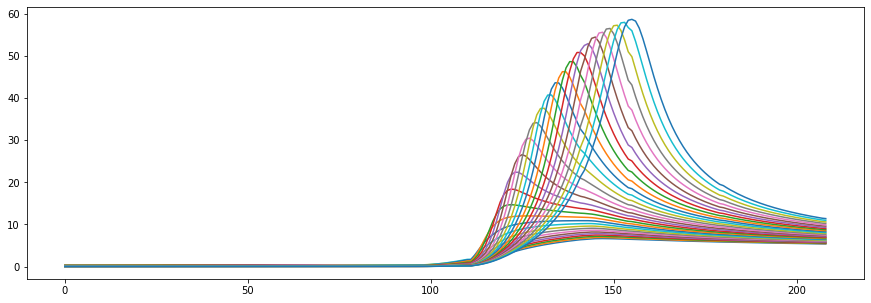

In [78]:
plt.figure(figsize=(15,5))
beta = np.zeros(n_obs,)
lat = np.zeros(n_obs,)

for j in np.arange(n_obs):
    beta_sub = np.zeros(np.size(t_s))
    for i in np.arange(np.size(t_s)):
        beta_sub[i] = compute_beta(x[i], y[i], z[i], x_observer_array[:,j])
        
    plt.plot(beta_sub)
    beta[j] = np.max(beta_sub)
    lat[j] = compute_lat_att(beta[j], x_observer_array[:,j])

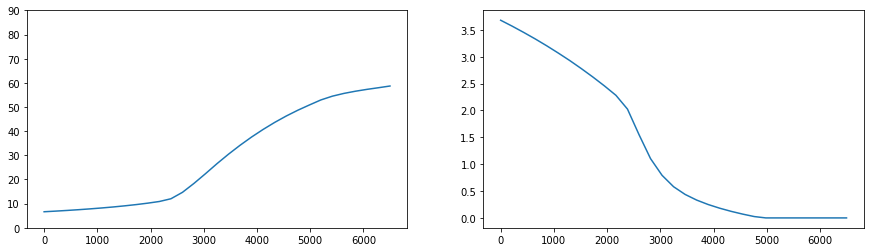

In [80]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(np.linspace(0, 6500, n_obs), beta)
ax[0].set_ylim([0,90])

ax[1].plot(np.linspace(0, 6500, n_obs), lat)

In [82]:
beta

array([ 6.6447817 ,  6.9047706 ,  7.18903892,  7.49747789,  7.83843777,
        8.21422647,  8.62735575,  9.09357098,  9.61466171, 10.20745815,
       10.89370745, 12.02188907, 14.68295855, 18.38553575, 22.41029478,
       26.565036  , 30.49623868, 34.17471216, 37.58876556, 40.7284476 ,
       43.62643615, 46.26228962, 48.65237502, 50.81870444, 52.91425631,
       54.47991221, 55.62258504, 56.52864029, 57.29652529, 57.97726397,
       58.68652021])